# PCA on 2D data
Converts 2D data to 1D or changes data so that it can be represented on a straight line

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

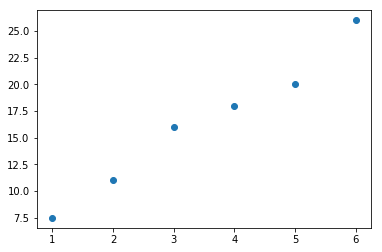

In [2]:
x1 = np.array([1, 2, 3, 4, 5, 6])
x2 = np.array([7.5, 11, 16, 18, 20, 26])
plt.scatter(x1, x2)
plt.show()

In [3]:
# combine x1 and x2 to form a 2D array
X = np.c_[x1, x2]
X

array([[ 1. ,  7.5],
       [ 2. , 11. ],
       [ 3. , 16. ],
       [ 4. , 18. ],
       [ 5. , 20. ],
       [ 6. , 26. ]])

In [4]:
pca = PCA(n_components=1) # pca object --> provide number of components we need to take
x_transform = pca.fit_transform(X)
x_transform

array([[-9.26049952],
       [-5.62047228],
       [-0.53656217],
       [ 1.65958219],
       [ 3.85572654],
       [ 9.90222524]])

In [5]:
# to get PCA components
pca.components_

array([[0.27096719, 0.96258858]])

In [6]:
# get back the orignal data
x_approx = pca.inverse_transform(x_transform)
x_approx

array([[ 0.99070848,  7.50261555],
       [ 1.97703643, 11.00646421],
       [ 3.35460926, 15.90017805],
       [ 3.94969232, 18.01416153],
       [ 4.54477538, 20.12814502],
       [ 6.18317813, 25.94843564]])

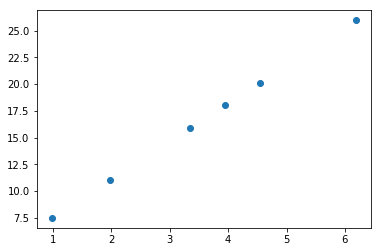

In [7]:
plt.scatter(x_approx[:, 0], x_approx[:, 1])
plt.show()

# PCA on 3D data
Converts 3D data into 2D which means that it transforms data such that it can be represented in a plane

In [8]:
np.random.seed(2343243)

In [9]:
# for class 1 mean and co-variance
mean_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 100)

In [10]:
# for class 2 mean and co-variance
mean_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2 = np.random.multivariate_normal(mean_vec2, cov_mat2, 100)

In [11]:
# plot the data
from mpl_toolkits.mplot3d import Axes3D, proj3d

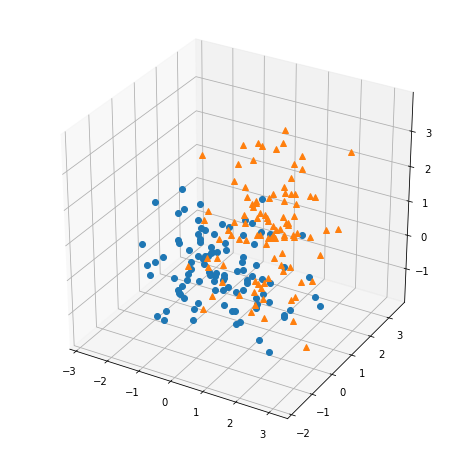

In [12]:
# create the figure
fig = plt.figure(figsize=(8, 8)) # 8 x 8 inches
ax = fig.add_subplot(111, projection='3d') # 111 --> 1 row, 1 col, and 1st position
ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o')
ax.plot(class2[:, 0], class2[:, 1], class2[:, 2], '^')
plt.show()

In [13]:
# combine all data
all_data = np.concatenate((class1, class2))

In [14]:
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(all_data)
transformed_data

array([[-0.52351425, -0.63301617],
       [-0.78786184,  0.94206431],
       [-1.28725924,  0.54439067],
       [ 0.66747707,  1.69846274],
       [-1.74150174, -0.755306  ],
       [-1.03559449, -1.53950125],
       [-0.21765053, -0.85555712],
       [-0.7648506 , -0.46590375],
       [-0.64255217,  1.16920769],
       [-0.5783154 , -0.30888845],
       [ 0.25251683, -0.38101091],
       [-0.26298255, -0.44282938],
       [-0.86147962,  0.21339394],
       [-0.9917517 , -0.32293363],
       [-1.3133147 ,  0.01268907],
       [-1.09145198, -0.50248537],
       [-2.05840949, -1.13678107],
       [-0.62975084, -1.78591257],
       [-1.75005325, -1.27909834],
       [-0.66142546,  1.66188479],
       [-0.34624366,  0.47524286],
       [ 0.77989322,  0.76153114],
       [-0.22203858, -0.7362751 ],
       [-1.06469867,  0.33693758],
       [-1.93640401, -0.97234577],
       [-2.44237038, -0.34276504],
       [-1.7918403 ,  0.40615644],
       [ 0.33656537,  1.36869154],
       [-1.38894876,

In [15]:
pca.components_

array([[ 0.41124564,  0.64810013,  0.64097055],
       [ 0.91063567, -0.26106644, -0.32029202]])

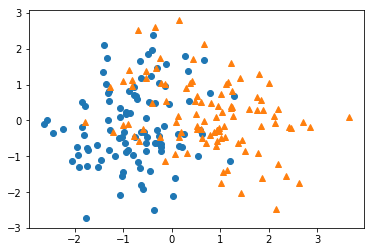

In [16]:
plt.plot(transformed_data[:100, 0], transformed_data[:100, 1], 'o')
plt.plot(transformed_data[100:200, 0], transformed_data[100:200, 1], '^')
plt.show()

In [17]:
# get back the orignal data
x_approx = pca.inverse_transform(transformed_data)
x_approx

array([[-3.35664295e-01,  4.13176049e-01,  3.02295557e-01],
       [ 9.89948385e-01, -1.69348317e-01, -3.71629178e-01],
       [ 4.22437580e-01, -3.89188594e-01, -5.64356504e-01],
       [ 2.27725356e+00,  5.76386779e-01,  3.18931815e-01],
       [-9.47917821e-01, -3.44276035e-01, -4.39230092e-01],
       [-1.37173271e+00,  3.17949615e-01,  2.64407149e-01],
       [-4.12532897e-01,  6.69504342e-01,  5.69623284e-01],
       [-2.82734282e-01,  2.13138481e-01,  9.40812870e-02],
       [ 1.25655122e+00, -1.34472617e-01, -3.51242174e-01],
       [-6.30387695e-02,  2.93040543e-01,  1.63354108e-01],
       [ 2.12960082e-01,  8.50331775e-01,  7.18993342e-01],
       [-5.53308896e-02,  5.32375288e-01,  4.08373388e-01],
       [ 2.96120162e-01, -2.68286325e-02, -1.85428702e-01],
       [-2.45852686e-01,  2.87591482e-02, -9.71478230e-02],
       [-7.24640551e-02, -2.67265701e-01, -4.10757511e-01],
       [-4.50360202e-01,  1.10183186e-02, -1.03543775e-01],
       [-1.42562955e+00, -4.50073651e-01

# Code for PCA

In [19]:
# creating co-variance matrix
all_data_t = all_data.T  # find transpose of the matrix
cov = np.cov(all_data_t)
cov

array([[1.14139998, 0.1061989 , 0.0918139 ],
       [0.1061989 , 1.11579657, 0.27166986],
       [0.0918139 , 0.27166986, 1.11826602]])

In [20]:
# find eigen values and vectors
eig_val, eig_vectors = np.linalg.eig(cov)
eig_val, eig_vectors

(array([1.45186534, 1.07866114, 0.8449361 ]),
 array([[ 0.41124564,  0.91063567,  0.0402454 ],
        [ 0.64810013, -0.26106644, -0.71540934],
        [ 0.64097055, -0.32029202,  0.69754554]]))

In [22]:
# sort eig values
eig_val_vector_pair = []
for i in range(len(eig_val)):
    eig_vec = eig_vectors[:, i]
    eig_val_vector_pair.append((eig_val[i], eig_vec))
eig_val_vector_pair.sort(reverse = True)  # for sorting in descending order
eig_val_vector_pair

[(1.4518653417359286, array([0.41124564, 0.64810013, 0.64097055])),
 (1.0786611401978583, array([ 0.91063567, -0.26106644, -0.32029202])),
 (0.8449360955327045, array([ 0.0402454 , -0.71540934,  0.69754554]))]

In [23]:
pca.components_, pca.explained_variance_

(array([[ 0.41124564,  0.64810013,  0.64097055],
        [ 0.91063567, -0.26106644, -0.32029202]]),
 array([1.45186534, 1.07866114]))